In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay


In [2]:
"""
1.0
Convert the sentiment scores of the small_corpus.csv into sentiment values. Categorize the reviews as positive, negative, or neutral on the basis of the sentiment scores.

If you want to get the same results as provided as a sample solution, utilize the following categories:
If the sentiment score of the review is over 0.2, its sentiment value is positive.
If the sentiment score of the review is lower than or equal to 0.2 and higher than or equal to -0.2, its sentiment value is neutral.
If the sentiment score of the review is under -0.2, its sentiment value is negative.
"""

small_corpus = pd.read_csv("small_corpus_sentiment.csv")

# Only using "sentiment_score_mark_neg" as it had the highest correlation with the "ratings" column
conditions = [
    small_corpus["sentiment_score_mark_neg"] < -0.2,
    small_corpus["sentiment_score_mark_neg"] > 0.2
    ]

categories = ["negative", "positive"]

small_corpus["sentiment_class"] = np.select(conditions, categories, default="neutral")
display(small_corpus)


,Unnamed: 0,ratings,reviews,sentiment_score,sentiment_score_mark_neg,sentiment_score_mark_neg_stop_words,sentiment_class
0,0,1,THE DAY GAMING CRIED...,0.000000,0.000000,0.0,neutral
1,1,1,One Star,0.000000,0.000000,0.0,neutral
2,2,1,"these do not work at all, all i get ...",0.111111,-0.666667,0.5,negative
3,3,1,last gen game,0.000000,0.000000,0.0,neutral
4,4,1,Waste,-1.000000,-1.000000,-1.0,negative
...,...,...,...,...,...,...,...
4495,4495,5,Five Stars,0.000000,0.000000,0.0,neutral
4496,4496,5,Five Stars,0.000000,0.000000,0.0,neutral
4497,4497,5,Five Stars,0.000000,0.000000,0.0,neutral
4498,4498,5,Awesome!,1.000000,1.000000,1.0,positive


In [3]:
"""
2.0
Convert the review ratings into rating classes. Categorize the review ratings as positive, negative, or neutral on the basis of the review ratings.

If you want to get the same results as it is provided as a sample solution, utilize the following categories:
If the review rating is 5, its sentiment value is positive.
If the review rating is 2, 3, or 4, its sentiment value is neutral.
If the review rating 1, its sentiment value is negative.
"""

conditions = [
    small_corpus["ratings"] == 1,
    small_corpus["ratings"] == 5
    ]

categories = ["negative", "positive"]

small_corpus["ratings_class"] = np.select(conditions, categories, default="neutral")


In [4]:
"""
3.0
Export your results to the data file and add two columns to the table. One of them should contain the sentiment scores of the reviews; the other should contain the rating classes.
"""

drop_columns = ["Unnamed: 0", "sentiment_score", "sentiment_score_mark_neg_stop_words"]
for col in drop_columns:
    small_corpus = small_corpus.drop(col, axis=1)

display(small_corpus)

,ratings,reviews,sentiment_score_mark_neg,sentiment_class,ratings_class
0,1,THE DAY GAMING CRIED...,0.000000,neutral,negative
1,1,One Star,0.000000,neutral,negative
2,1,"these do not work at all, all i get ...",-0.666667,negative,negative
3,1,last gen game,0.000000,neutral,negative
4,1,Waste,-1.000000,negative,negative
...,...,...,...,...,...
4495,5,Five Stars,0.000000,neutral,positive
4496,5,Five Stars,0.000000,neutral,positive
4497,5,Five Stars,0.000000,neutral,positive
4498,5,Awesome!,1.000000,positive,positive


In [5]:
"""
4.0
Evaluate your dictionary-based sentiment analyzer in two steps:

4.1 Calculate the following values:

 - How many reviews are categorized correctly as positive, negative, or neutral by your dictionary-based sentiment analyzer? 
    (This value is called accuracy.)
 - What is the ratio of correct predictions per category? For example, a review is positive and your sentiment analyzer manages to categorize it as             positive. 
    (This value is called precision.)
 - What portion the reviews is categorized correctly per category? For example, 300 reviews are positive, and your sentiment analyzer categorizes only 200      reviews out of the 300 as positive. 
    (This value is called recall.)

It is recommended to use the metrics module of scikit learn package to perform these tasks.
"""

"""
4.2 Write a textual summary on the performance of your sentiment analyzer.

It is recommended to use the evaluation text report function of the metrics module.
"""

# Combined steps 4.1 and 4.2
report = classification_report(small_corpus["ratings_class"], small_corpus["sentiment_class"])
print(report)


              precision    recall  f1-score   support

    negative       0.60      0.41      0.49      1500
     neutral       0.33      0.59      0.43      1500
    positive       0.60      0.32      0.42      1500

    accuracy                           0.44      4500
   macro avg       0.51      0.44      0.45      4500
weighted avg       0.51      0.44      0.45      4500



Predicted,negative,neutral,positive,Total
Actual,,,,
negative,621,824,55,1500
neutral,346,890,264,1500
positive,69,949,482,1500
Total,1036,2663,801,4500


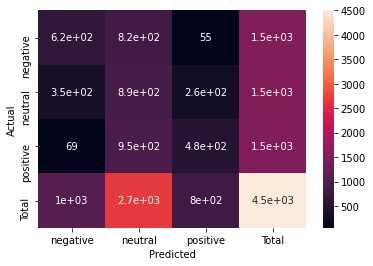

In [6]:
"""
5.0
Illustrate the evaluation of your sentiment analyzer. Create a confusion matrix in Altair.
"""
source = small_corpus.copy()
source = source.drop(["ratings", "reviews", "sentiment_score_mark_neg"], axis=1)

confusion_matrix = pd.crosstab(small_corpus["ratings_class"], small_corpus["sentiment_class"], rownames=['Actual'], colnames=['Predicted'], margins=True, margins_name="Total")
display(confusion_matrix)
sn.heatmap(confusion_matrix, annot=True)
plt.show()